In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
from collections import Counter

In [ ]:
#This data set is transaction data so we read it directly 

In [2]:
with open("C:/Users/ARAVINDH/Downloads/groceries.csv") as f:
    groceries = f.read()

In [ ]:
#Splitting the data into separate transactions

In [3]:
groceries = groceries.split("\n")

In [4]:
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

In [5]:
all_groceries_list=[]

In [ ]:
#groceries_list

In [6]:
all_groceries_list=[i for item in groceries_list for i in item]

In [7]:
item_frequencies=Counter(all_groceries_list)

In [ ]:
# Sorting

In [8]:
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])

In [9]:
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

In [ ]:
#bar plot

<ipython-input-12-de657ff7c7b5>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(height = frequencies[0:11],x = list(range(0,11)),color='rgbkymc');plt.xticks(list(range(0,11),),items[0:11]);plt.xlabel("items")


Text(0, 0.5, 'Count')

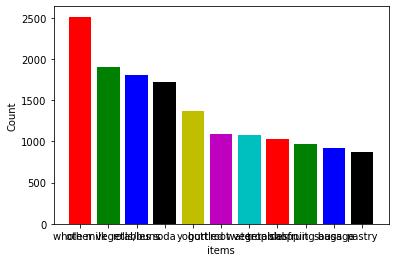

In [12]:
plt.bar(height = frequencies[0:11],x = list(range(0,11)),color='rgbkymc');plt.xticks(list(range(0,11),),items[0:11]);plt.xlabel("items")
plt.ylabel("Count")

In [13]:
#converting all list into Series object

In [15]:
groceries_series=pd.DataFrame(pd.Series(groceries_list))

In [16]:
groceries_series=groceries_series.iloc[:9835,:] 

In [18]:
groceries_series.columns=["transactions"]

In [ ]:
#Creating a dummy variable for the each item in each transactions

In [19]:
x=groceries_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')

In [21]:
frequent_itemsets=apriori(x, min_support=0.005, max_len=3,use_colnames = True)

In [22]:
frequent_itemsets.shape

(989, 2)

In [ ]:
#Most Frequent item
#Using support value

In [23]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

<ipython-input-50-bd22bb4f3a12>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgb');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])


Text(0, 0.5, 'support')

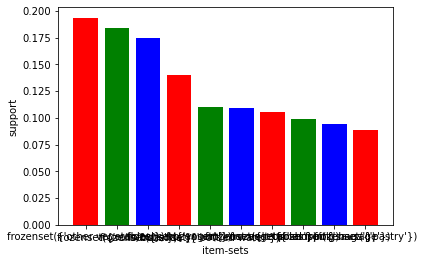

In [50]:
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgb');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')

In [ ]:
#Rules

In [25]:
rules=association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.shape

(2700, 9)

In [28]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157


In [29]:
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2695,(frankfurter),(coffee),0.058973,0.058058,0.005084,0.086207,1.484842,0.001660,1.030805
2696,(cream cheese ),(curd),0.039654,0.053279,0.005084,0.128205,2.406293,0.002971,1.085945
2697,(curd),(cream cheese ),0.053279,0.039654,0.005084,0.095420,2.406293,0.002971,1.061648
2698,(other vegetables),(canned fish),0.193493,0.015048,0.005084,0.026274,1.745998,0.002172,1.011529
2699,(canned fish),(other vegetables),0.015048,0.193493,0.005084,0.337838,1.745998,0.002172,1.217991


In [30]:
rules.sort_values('lift',ascending = False,inplace=True)

In [31]:
rules   #Sorting rules by maximum Lift ratio

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2558,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,3.988184e-03,1.190407
2559,(white bread),(ham),0.042095,0.026029,0.005084,0.120773,4.639851,3.988184e-03,1.107758
2021,(whipped/sour cream),"(other vegetables, butter)",0.071683,0.020031,0.005796,0.080851,4.036397,4.359786e-03,1.066171
2020,"(other vegetables, butter)",(whipped/sour cream),0.020031,0.071683,0.005796,0.289340,4.036397,4.359786e-03,1.306275
1313,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,5.242526e-03,1.051406
...,...,...,...,...,...,...,...,...,...
467,(bottled water),(shopping bags),0.110524,0.098526,0.010981,0.099356,1.008428,9.177354e-05,1.000922
275,(pip fruit),(rolls/buns),0.075648,0.183935,0.013930,0.184140,1.001114,1.549719e-05,1.000251
274,(rolls/buns),(pip fruit),0.183935,0.075648,0.013930,0.075732,1.001114,1.549719e-05,1.000091
2177,(specialty chocolate),(rolls/buns),0.030402,0.183935,0.005592,0.183946,1.000063,3.515039e-07,1.000014


In [ ]:
#Eliminate Repeated Rules 

In [32]:
def to_list(i):
    return (sorted(list(i)))

In [33]:
ma_X=rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [34]:
ma_X = ma_X.apply(sorted)

In [35]:
rules_sets=list(ma_X)

In [ ]:
#Unique Rules

In [36]:
unique_rules_sets=[list(m) for m in set(tuple(i) for i in rules_sets)]

In [37]:
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [38]:
rules=rules.iloc[index_rules,:]

In [39]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
278,(soda),(canned beer),0.174377,0.077682,0.013828,0.079300,1.020836,0.000282,1.001758
972,"(yogurt, root vegetables)",(tropical fruit),0.025826,0.104931,0.008134,0.314961,3.001587,0.005424,1.306594
1593,(cream cheese ),(whipped/sour cream),0.039654,0.071683,0.006406,0.161538,2.253519,0.003563,1.107167
527,(other vegetables),"(fruit/vegetable juice, whole milk)",0.193493,0.026640,0.010473,0.054125,2.031756,0.005318,1.029058
258,(root vegetables),(domestic eggs),0.108998,0.063447,0.014337,0.131530,2.073071,0.007421,1.078394
...,...,...,...,...,...,...,...,...,...
1870,"(whole milk, domestic eggs)",(butter),0.029995,0.055414,0.005999,0.200000,3.609174,0.004337,1.180732
188,(bottled beer),(soda),0.080529,0.174377,0.016980,0.210859,1.209209,0.002938,1.046229
668,(fruit/vegetable juice),(pip fruit),0.072293,0.075648,0.009558,0.132208,1.747671,0.004089,1.065177
940,(yogurt),"(fruit/vegetable juice, other vegetables)",0.139502,0.021047,0.008236,0.059038,2.805013,0.005300,1.040374


In [ ]:
#Sorting rules by Lift-ratio

In [46]:
final_rules=rules.sort_values('lift',ascending=False)

In [47]:
final_rules.head() #Top 5 lift-ratio rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2558,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2021,(whipped/sour cream),"(other vegetables, butter)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
1313,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
2042,"(root vegetables, other vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2206,(tropical fruit),"(citrus fruit, pip fruit)",0.104931,0.013828,0.005592,0.053295,3.854060,0.004141,1.041688


In [48]:
final_rules.tail()  #Least 5 lift-ratio rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2198,(other vegetables),(misc. beverages),0.193493,0.028368,0.005592,0.028902,1.018812,1.032594e-04,1.000550
316,(soda),(pip fruit),0.174377,0.075648,0.013320,0.076385,1.009738,1.284540e-04,1.000798
466,(shopping bags),(bottled water),0.098526,0.110524,0.010981,0.111455,1.008428,9.177354e-05,1.001048
275,(pip fruit),(rolls/buns),0.075648,0.183935,0.013930,0.184140,1.001114,1.549719e-05,1.000251
2177,(specialty chocolate),(rolls/buns),0.030402,0.183935,0.005592,0.183946,1.000063,3.515039e-07,1.000014
